<a href="https://colab.research.google.com/github/venkat31032000/002273025/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABSTRACT:

A credit score is a number that indicates a person's creditworthiness and is based on a level study of their credit files.The main component of a credit score is a credit report, which is obtained mostly from credit agencies.
Credit scores are used by lenders, including banks and credit card firms, to assess the possible risk involved in making loans to customers and to reduce losses from bad debt. Credit scores are used by lenders to establish credit limits, interest rates, and loan eligibility.Credit ratings are also used by lenders to identify the clients who are most likely to generate revenue.


The aim of the Notebook is to check the quality of the data and determine which features are important.The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset
• Which independent variables are useful to predict a target (dependent variable)?
• Which independent variables have missing data? How much
• Do the training and test sets have the same data?
• In the predictor variables independent of all the other predictor variables?
• Which predictor variables are the most important?
• Do the ranges of the predictor variables make sense?
• What are the distributions of the predictor variables?
Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that all independent variables are significant except one, these results can be used to further optimize the model for predicting abalone's age and give better predictions



Q1) What are the data types? (Only numeric and categorical)
A) Dataset consists for 13 characteristics. They are
DATA SET Numeric Features: INCOME, SAVINGS, DEBT, R_SAVINGS_INCOME, R_DEBT_INCOME, R_DEBT_SAVINGS, T_{GROUP}6, T_GROUP_12, R[GROUP], R_[GROUP]INCOME, R_[GROUP]SAVINGS, R_[GROUP]DEBT, CREDIT_SCORE. Categorical Features: CAT_GAMBLING, CAT_DEBT, CAT_CREDIT_CARD, CAT_MORTGAGE, CAT_SAVINGS_ACCOUNT, CAT_DEPENDENTS, and the transaction group categorical variables.
There are a total of 1273 observations.



In [ ]:
#Reading the credit score dataset
import pandas as pd
path="/content/drive/MyDrive/Dataset/DATASET.csv"
df=pd.read_csv(path)
df.head()

CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0  C02COQEVYU   33269        0   532304            0.0000        16.0000   
1  C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2  C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3  C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4  C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   

   R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0          1.2000           1889           945      0.5003  ...   
1          3.4615           5818           111      0.0191  ...   
2         24.7142           1157           860      0.7433  ...   
3          9.7499           6857          3686      0.5376  ...   
4          2.0465           1978           322      0.1628  ...   

   R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                 0.0000              0.0625          High         1   
1                 0.7692              0.2222            No         1   
2                 1.4286              0.0578          High         1   
3                 1.2500              0.1282          High         1   
4                 0.1163              0.0568          High         1   

   CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                0             0                    0               0   
1                0             0                    1               0   
2                0             0                    1               0   
3                0             0                    1               0   
4                1             1                    1               1   

   CREDIT_SCORE  DEFAULT  
0           444        1  
1           625        0  
2           469        1  
3           559        0  
4           473        0  

[5 rows x 87 columns]

2Q) Are there any missing values?

Based on the intial data performed, there were no missing values in the dataset.Each coloumn had a count of 1000 non null-entries, which matches the total number of rows in the dataset.

In [ ]:
df.isnull().sum()

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64

3Q) What are the likely distributions of the numeric variables?
A) Income,Savings,Debt,R_Savings_Income,R_Det_Income,R_debt_savings

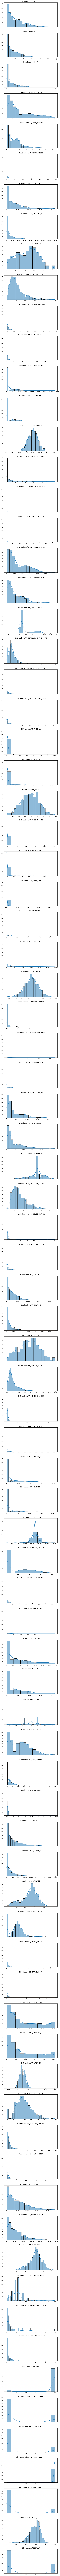

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
def plot_distributions(df, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 4 * len(columns)))
    for ax, col in zip(axes, columns):
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(f'Distribution of {col}', fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    return fig
fig = plot_distributions(data, numeric_columns)
plt.show()

4Q)Which independent variables are most useful for predicting a target variable in a dataset we can employ various feature selection methods,since my target variable is "credit score". we use three methods. They are:

1.Correlation Matrix: Identifying variables that have a strong correlation with the target variable.

2.Random Forest Feature Importance: Using a Random Forest model to evaluate the importance of each feature.

3.Recursive Feature Elimination (RFE): Systematically removing features to see which ones have the most impact on the model's accuracy.

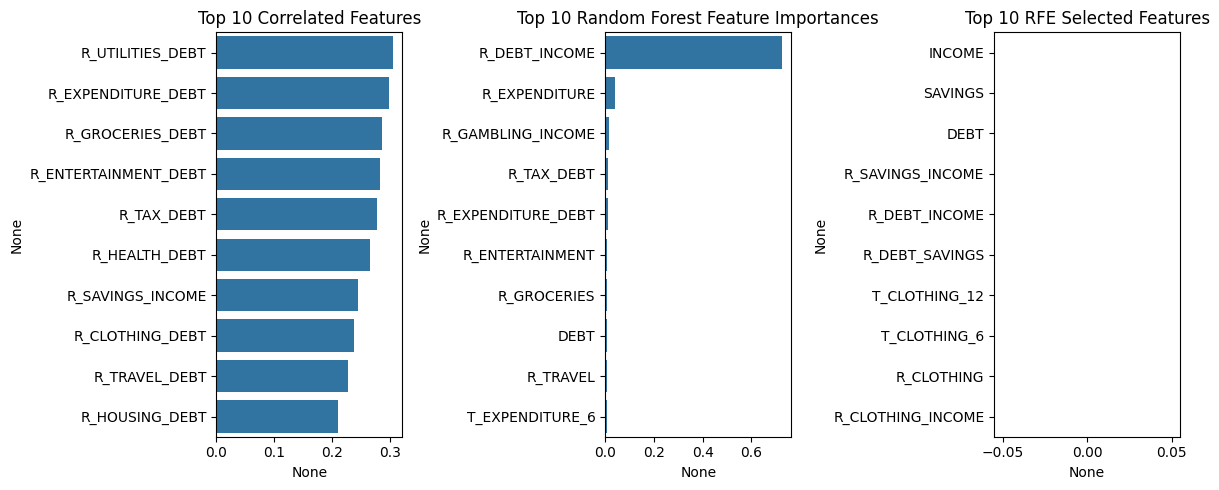

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# Preparing the data
X = df.drop('CREDIT_SCORE', axis=1)  # Independent variables
y = df['CREDIT_SCORE']               # Target variable

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Method 1: Correlation Matrix
corr_matrix = X_train.corrwith(y_train).sort_values(ascending=False)

# Method 2: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Method 3: Recursive Feature Elimination (RFE) with Linear Regression
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)  # Adjust number of features to select as needed
rfe.fit(X_train, y_train)
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_
rfe_features = pd.Series(rfe_support, index=X_train.columns)

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=corr_matrix.head(10), y=corr_matrix.head(10).index)
plt.title('Top 10 Correlated Features')

plt.subplot(1, 3, 2)
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title('Top 10 Random Forest Feature Importances')

plt.subplot(1, 3, 3)
sns.barplot(x=rfe_features.head(10), y=rfe_features.head(10).index)
plt.title('Top 10 RFE Selected Features')

plt.tight_layout()
plt.show()

5Q)which independent variables having missing data? How much?
Ans) The dataset does not have any missing values.

In [ ]:
missing_data = df.isnull().sum()

missing_data = missing_data[missingdata>0]
print(missing_data)

Series([], dtype: int64)


6Q)Do the training and the test sets have the same data?
Ans) The training and the test sets have similar distribution of data, you can compare summary statitics

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# # Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Comparing key statistics of the training and test sets
train_stats = X_train.describe()
test_stats = X_test.describe()

# Displaying the statistics for comparison
print("Training Set Statistics:\n", train_stats)
print("\nTest Set Statistics:\n", test_stats)

Training Set Statistics:
               INCOME       SAVINGS          DEBT  R_SAVINGS_INCOME  \
count     800.000000  8.000000e+02  8.000000e+02        800.000000   
mean   119917.540000  4.102326e+05  7.646742e+05          4.135866   
std    111932.885423  4.359139e+05  9.465872e+05          4.029775   
min         0.000000  0.000000e+00  0.000000e+00          0.000000   
25%     30450.250000  6.121550e+04  5.174075e+04          1.076900   
50%     82551.000000  2.766285e+05  3.921800e+05          2.599350   
75%    178268.000000  6.222600e+05  1.133668e+06          6.479875   
max    557523.000000  2.738164e+06  5.968620e+06         15.889100   

       R_DEBT_INCOME  R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
count     800.000000      800.000000     800.000000    800.000000  800.000000   
mean        5.987873        5.856906    6704.412500   3351.816250    0.451826   
std         5.866561       17.729265    7365.584379   5059.796633    0.237858   
min         0.00000

7Q) In the predictor variables independent of all the other predictor variables?
Ans) the predictor variables in our dataset are independent of each other, we can calculate the correlation between each pair of variables. This is typically done using a correlation matrix, which shows the correlation coefficients between every pair of variables in our dataset. The resulting heatmap will show you the correlation coefficients between each pair of variables.


<ipython-input-10-ab557a5ba7fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


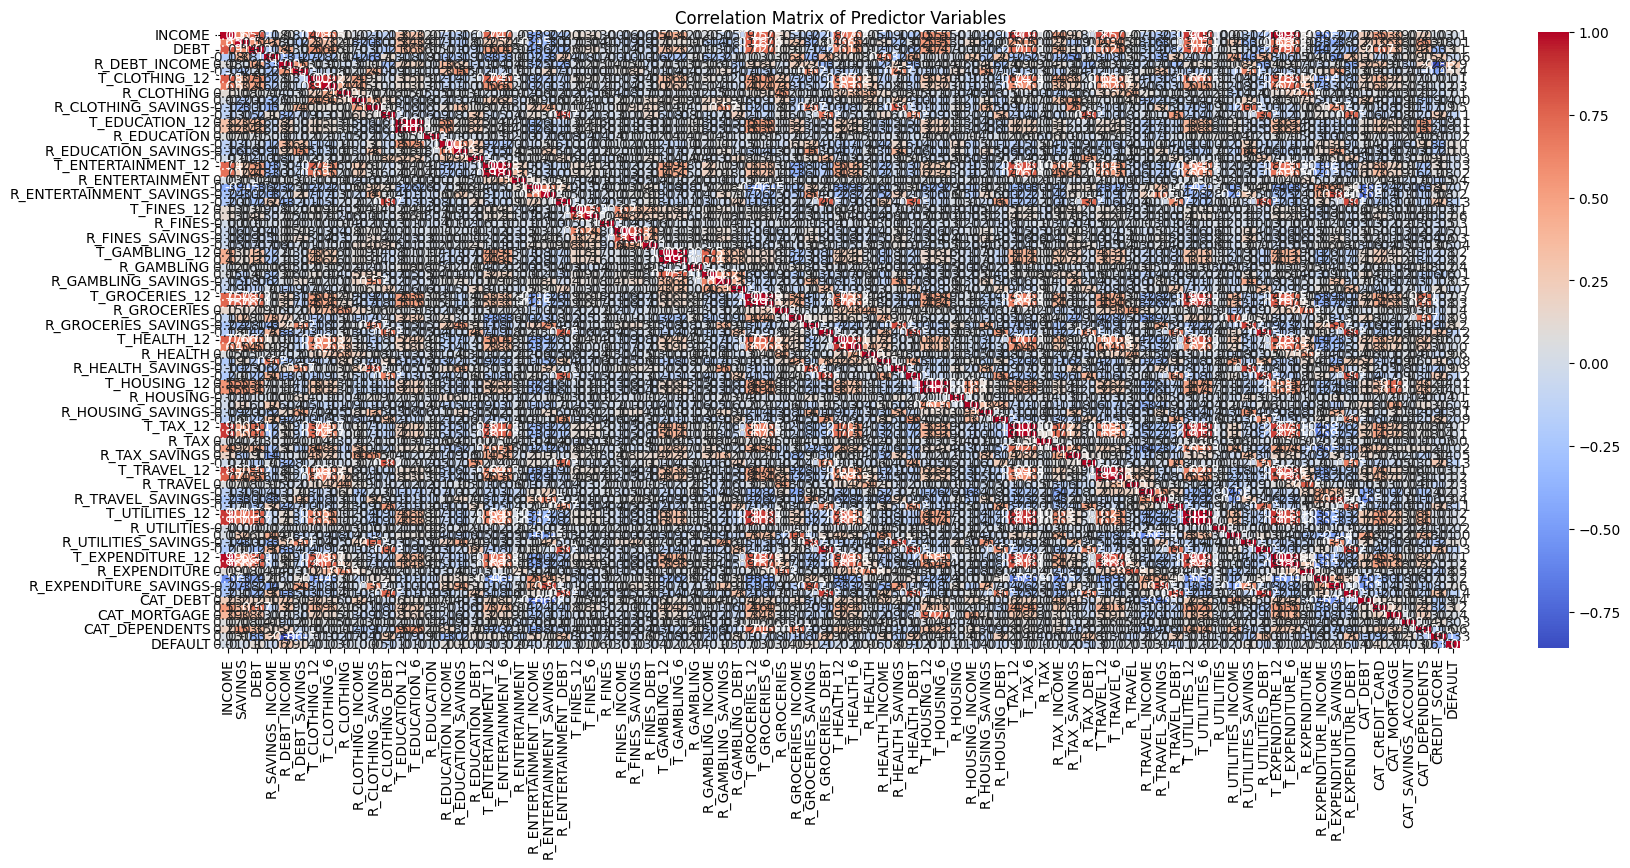

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()

8Q) Which predictor variables are the most important?
Ans) Predictor variables in a dataset are most crucial, particularly when considering a target variable, we may utilize machine learning models that offer feature significance metrics. A popular and successful method is to use a Random Forest or other tree-based model. These models may offer a feature significance rating and handle both numerical and categorical data.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# # Preparing the data (assuming 'Price' is the target variable)
# # Replace 'Price' with your actual target variable name
X = df.drop('CREDIT_SCORE', axis=1)
y = df['CREDIT_SCORE']
#
# # Converting categorical variables to dummy variables
X = pd.get_dummies(X)
#
# # Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
#
# # Getting feature importances
feature_importances = rf_model.feature_importances_
#
# # Creating a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#
# # Displaying the feature importances
feature_importance_df

                Feature  Importance
4         R_DEBT_INCOME    0.728040
74        R_EXPENDITURE    0.041417
33    R_GAMBLING_INCOME    0.014901
59           R_TAX_DEBT    0.011964
38          R_GROCERIES    0.007978
..                  ...         ...
537  CUST_ID_CGZ4LFGPMX    0.000000
540  CUST_ID_CH14JY8U3M    0.000000
542  CUST_ID_CH1N08U3DP    0.000000
545  CUST_ID_CH5S6O1SML    0.000000
543  CUST_ID_CH35QMTKX3    0.000000

[1087 rows x 2 columns]



9Q) Do the ranges of the predictor variables make sense?

Ans) predictor variables in your dataset make sense, you can inspect the minimum and maximum values along with basic descriptive statistics for each predictor variable.


In [ ]:
predictor_variables = df.drop('CREDIT_SCORE', axis=1)

# Calculating descriptive statistics for the predictor variables
descriptive_stats = predictor_variables.describe()

# Displaying the descriptive statistics
descriptive_stats

              INCOME       SAVINGS          DEBT  R_SAVINGS_INCOME  \
count    1000.000000  1.000000e+03  1.000000e+03       1000.000000   
mean   121610.019000  4.131896e+05  7.907180e+05          4.063477   
std    113716.699591  4.429160e+05  9.817904e+05          3.968097   
min         0.000000  0.000000e+00  0.000000e+00          0.000000   
25%     30450.250000  5.971975e+04  5.396675e+04          1.000000   
50%     85090.000000  2.738505e+05  3.950955e+05          2.545450   
75%    181217.500000  6.222600e+05  1.193230e+06          6.307100   
max    662094.000000  2.911863e+06  5.968620e+06         16.111200   

       R_DEBT_INCOME  R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  \
count    1000.000000     1000.000000    1000.000000   1000.000000   
mean        6.068449        5.867252    6822.401000   3466.320000   
std         5.847878       16.788356    7486.225932   5118.942977   
min         0.000000        0.000000       0.000000      0.000000   
25%         1.454500    

10Q) What are the distributions of the predictor variables?

Ans) the distributions of the predictor (independent) variables in your dataset, we can create histograms for each of these variables. Histograms are useful for visualizing the distribution of data points across different ranges of values


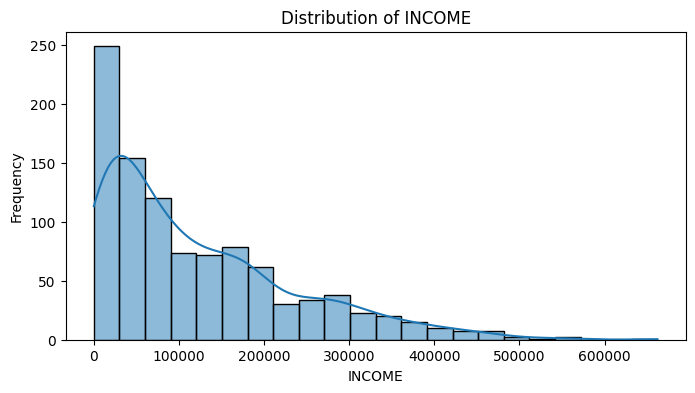

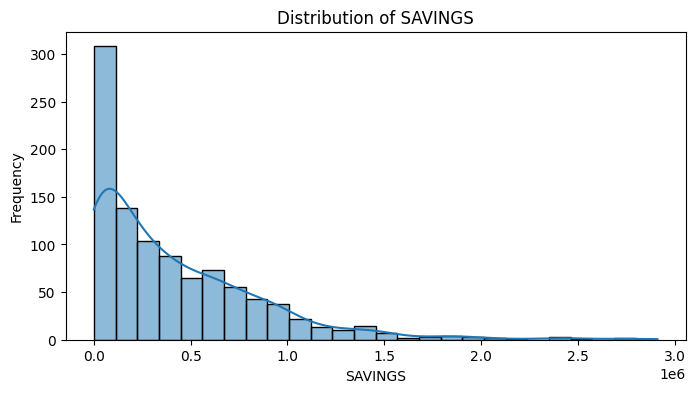

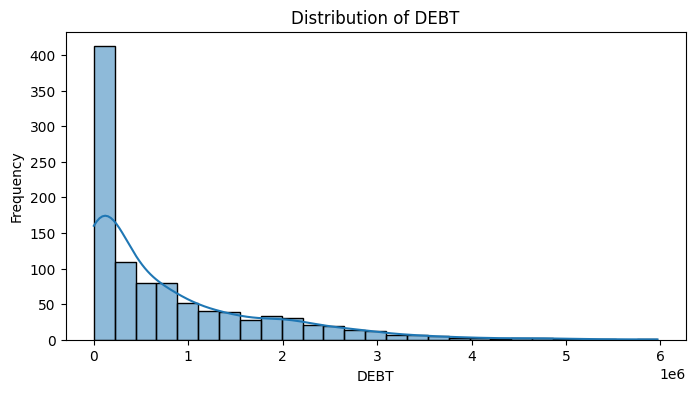

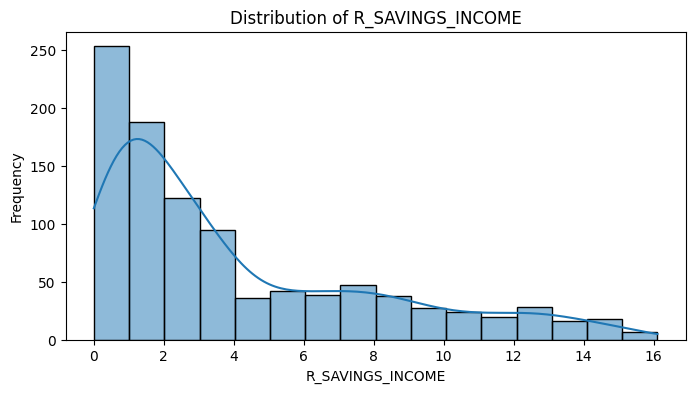

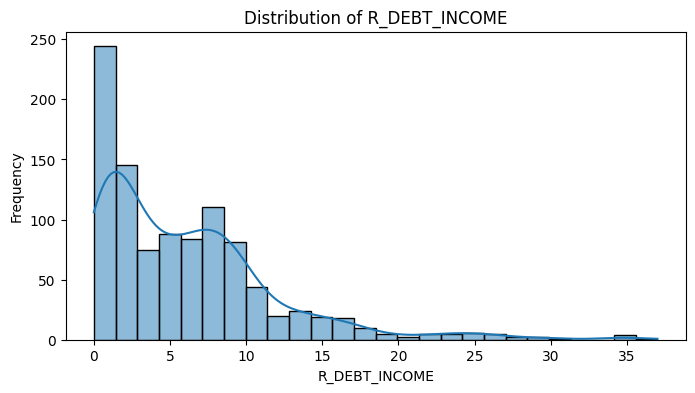

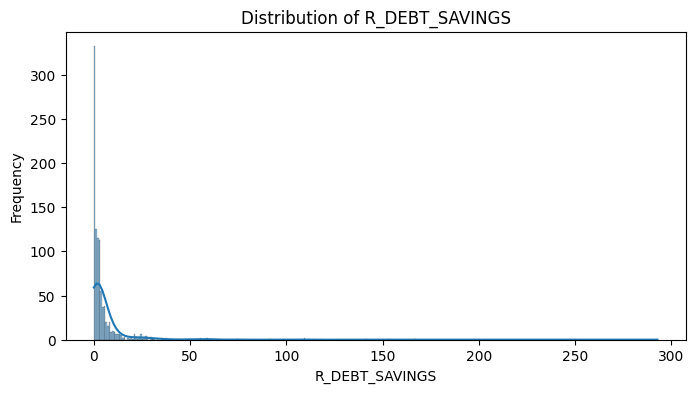

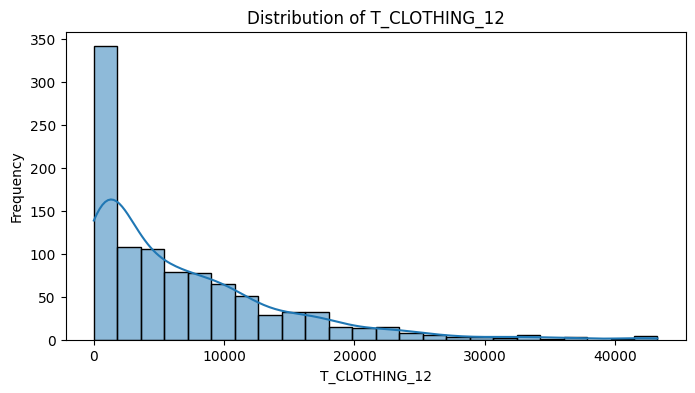

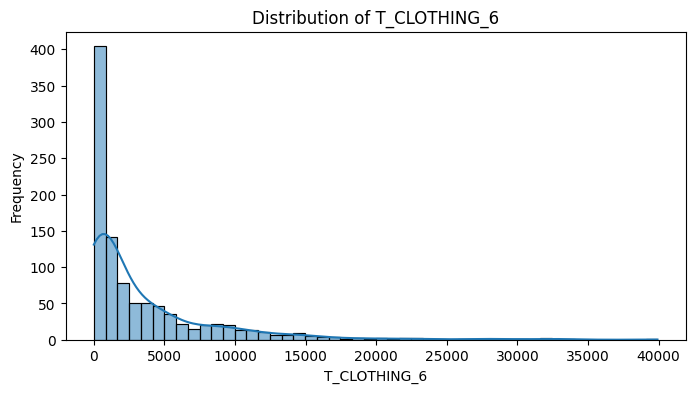

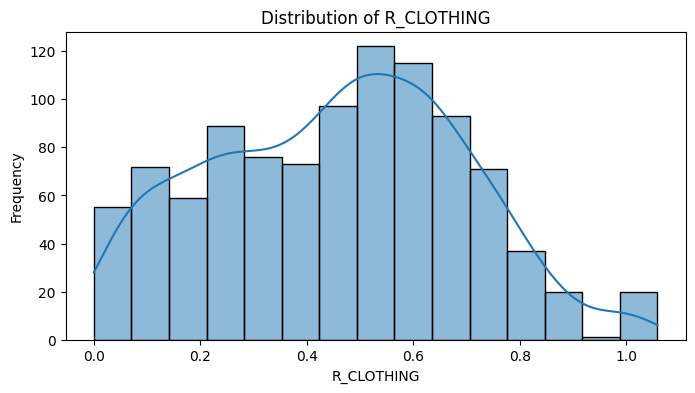

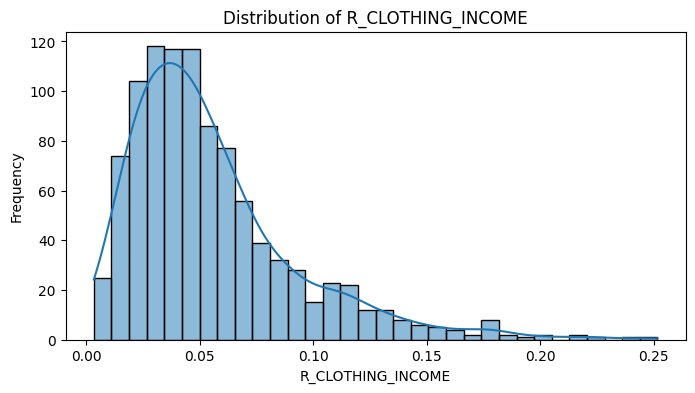

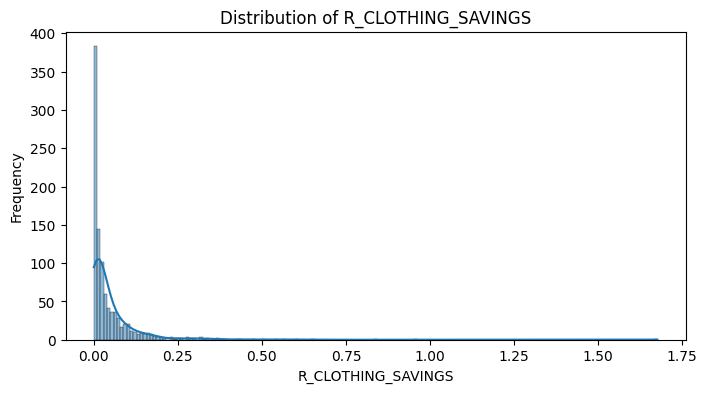

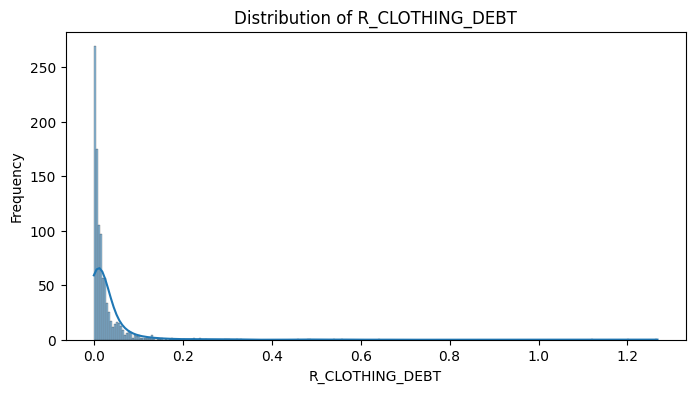

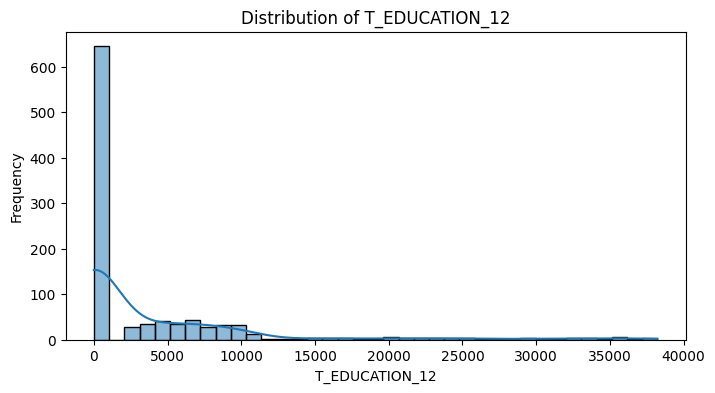

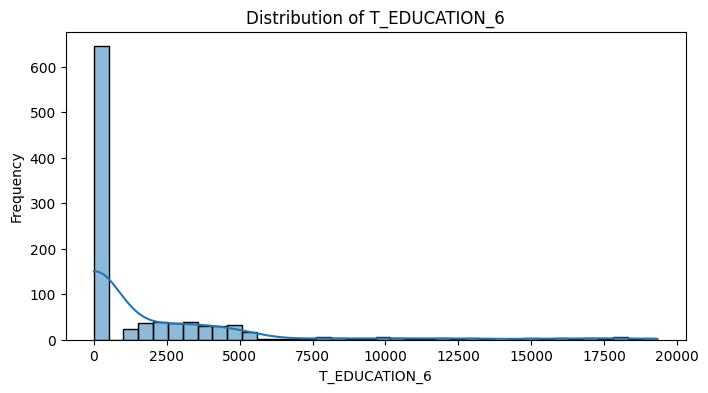

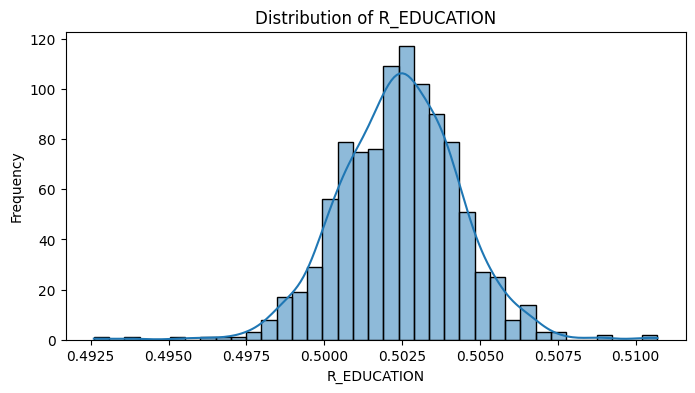

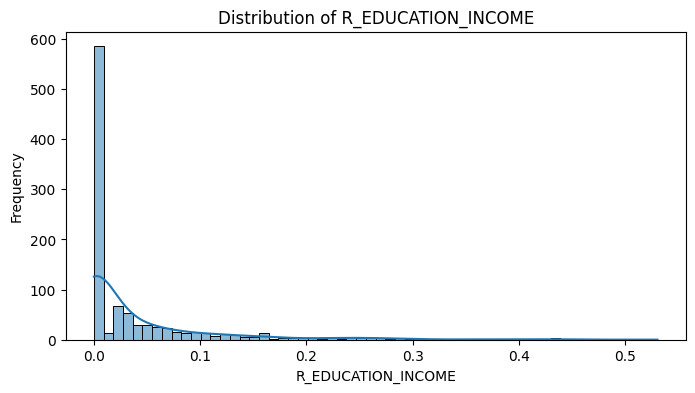

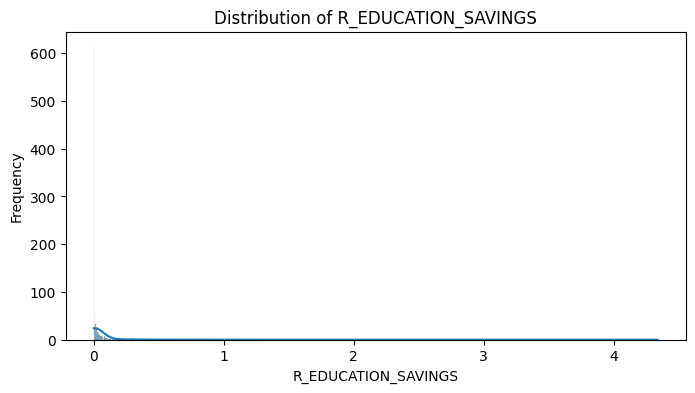

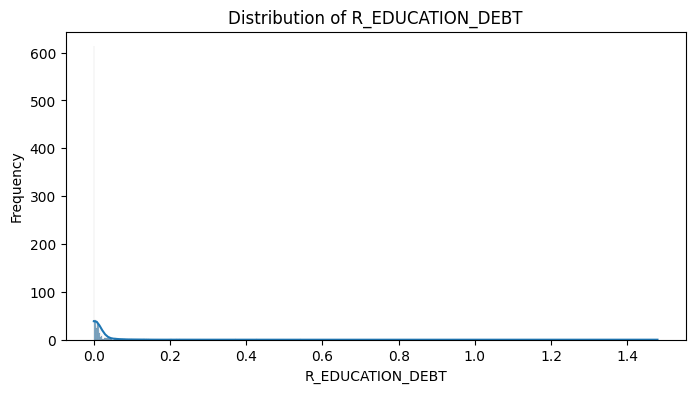

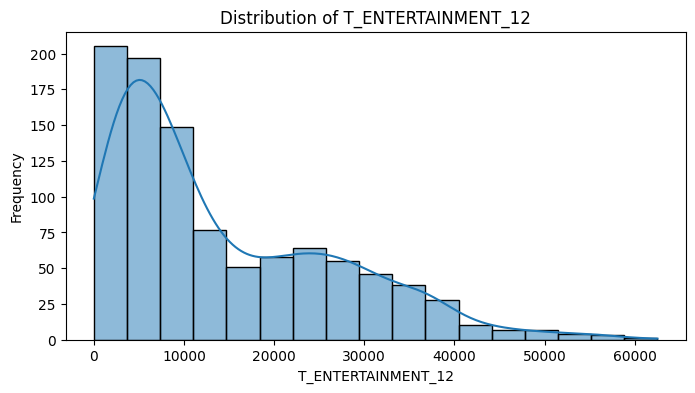

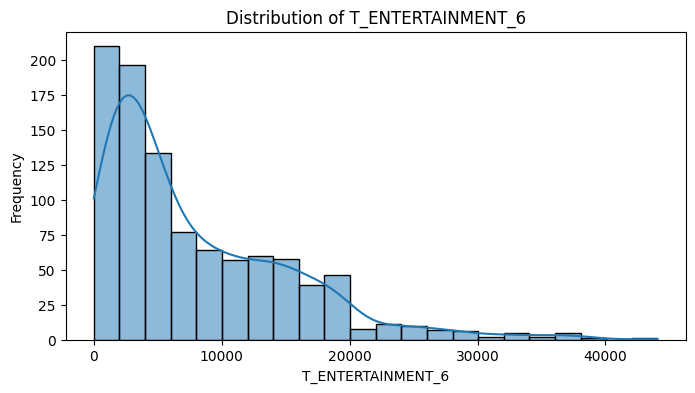

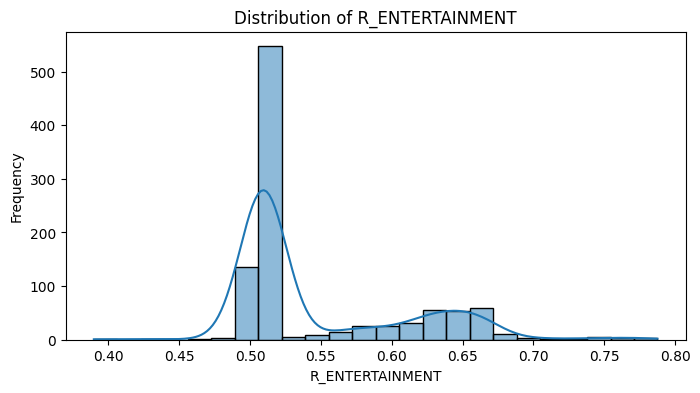

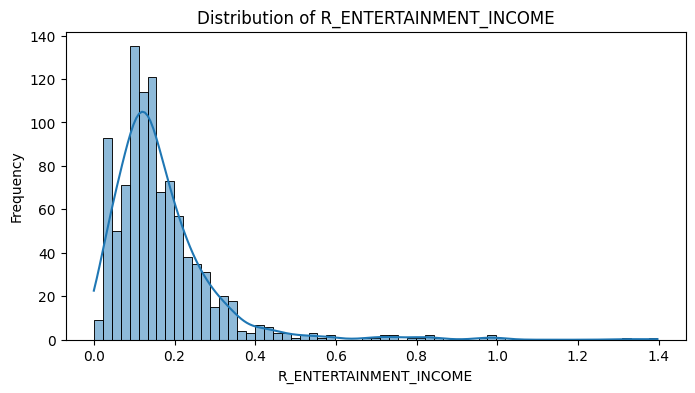

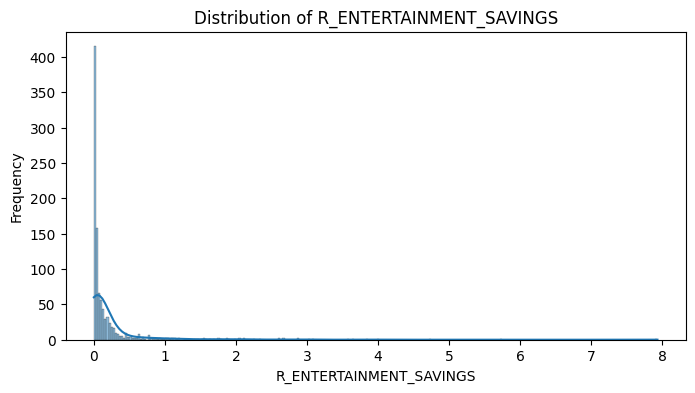

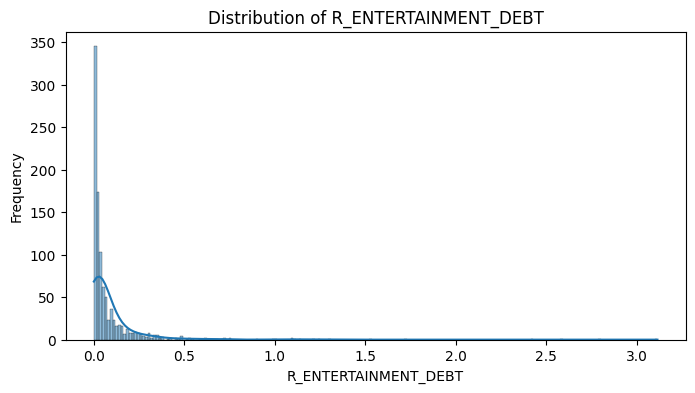

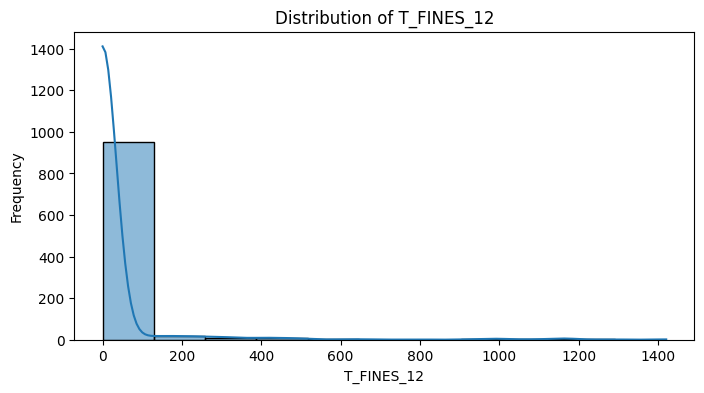

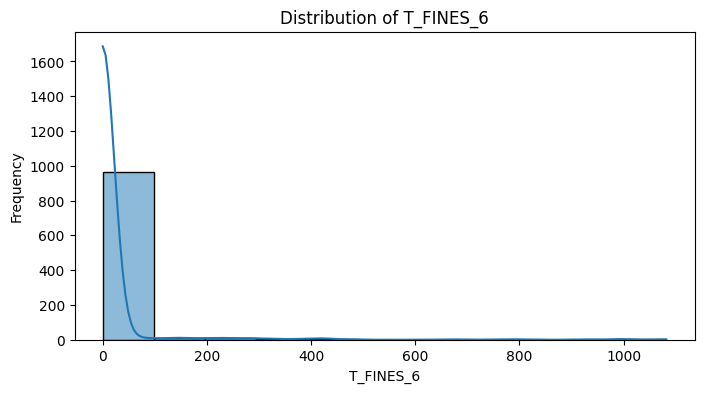

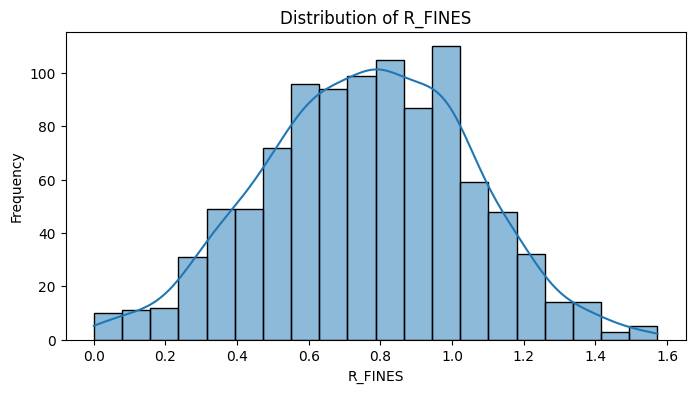

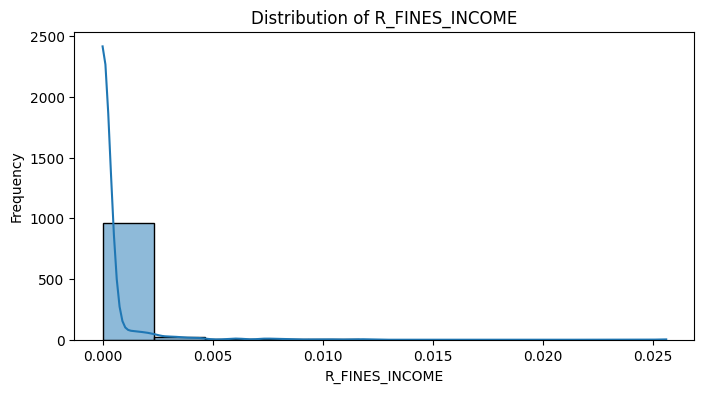

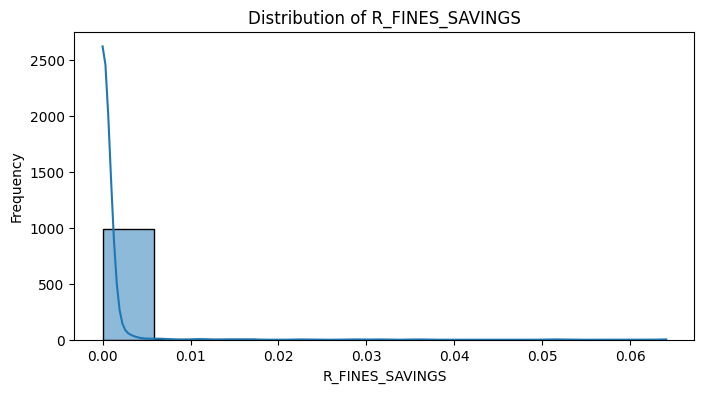

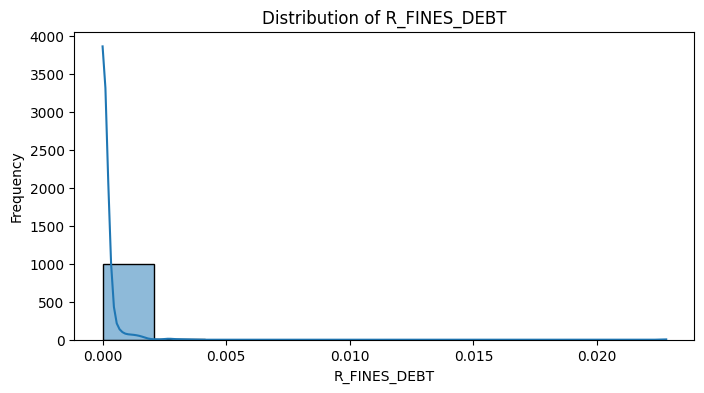

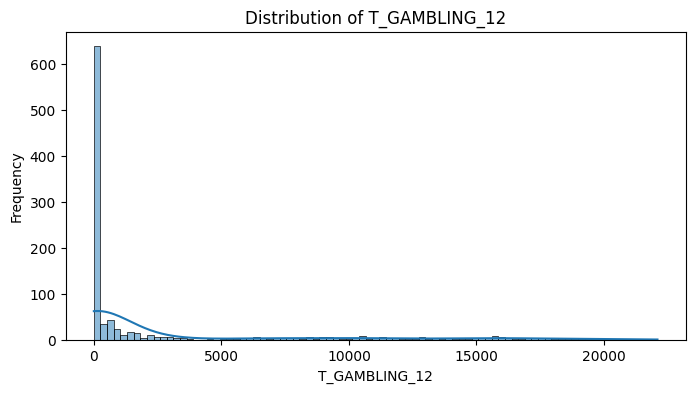

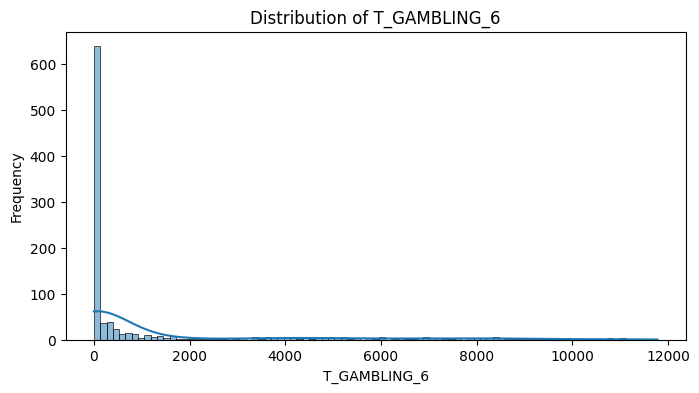

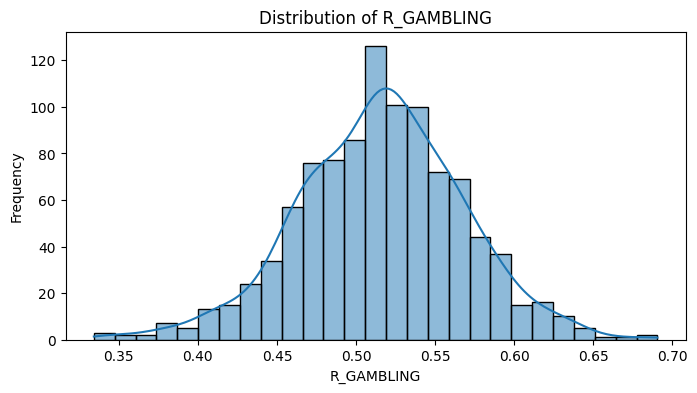

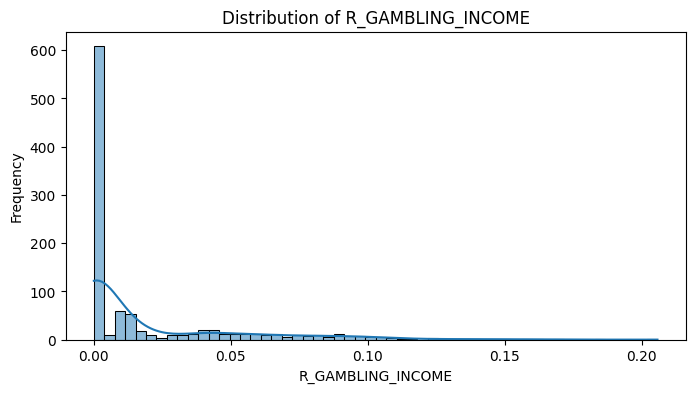

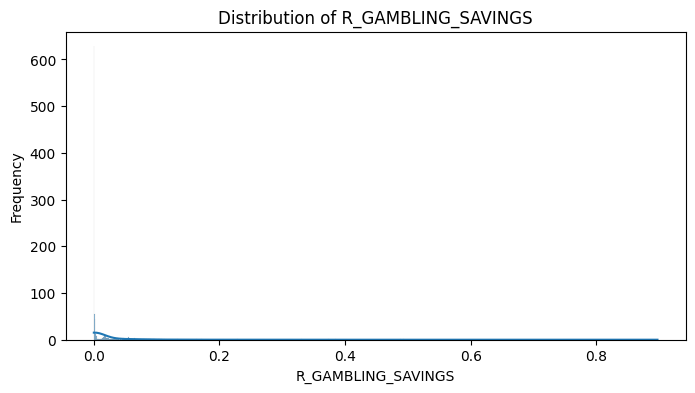

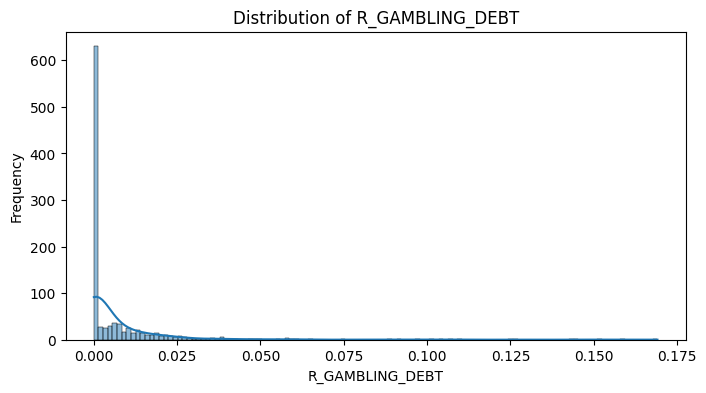

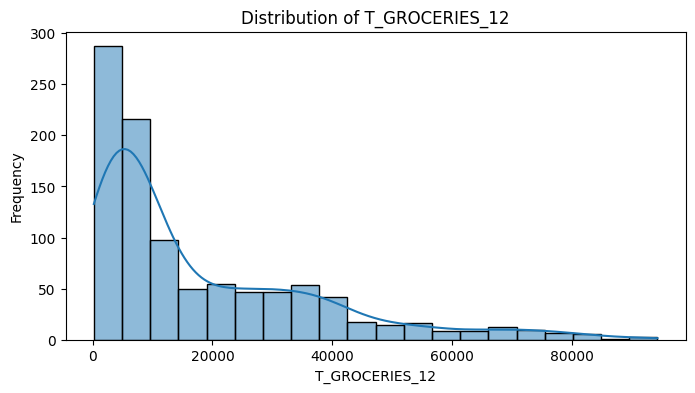

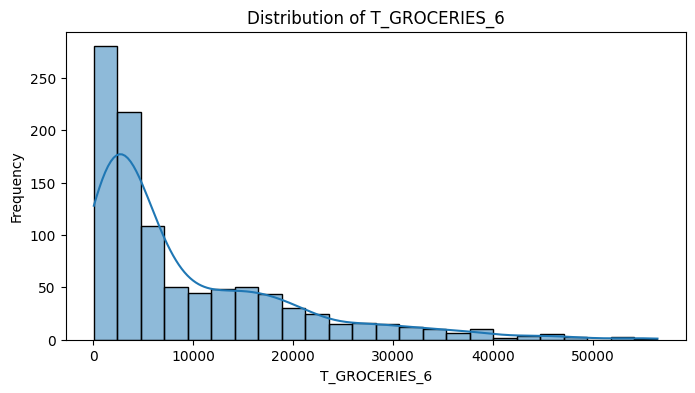

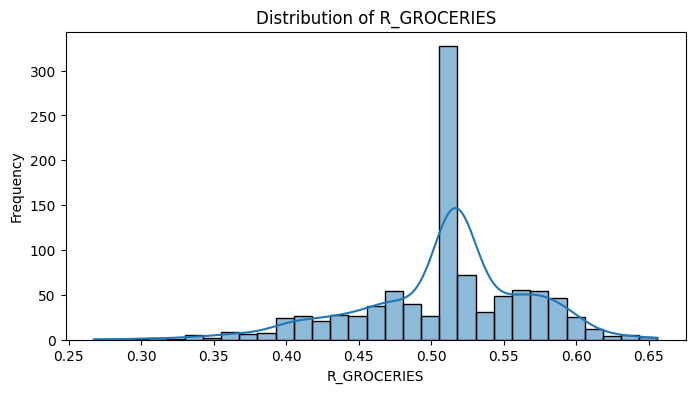

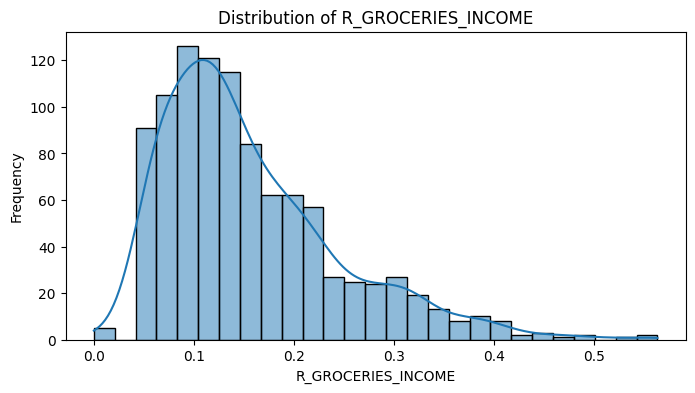

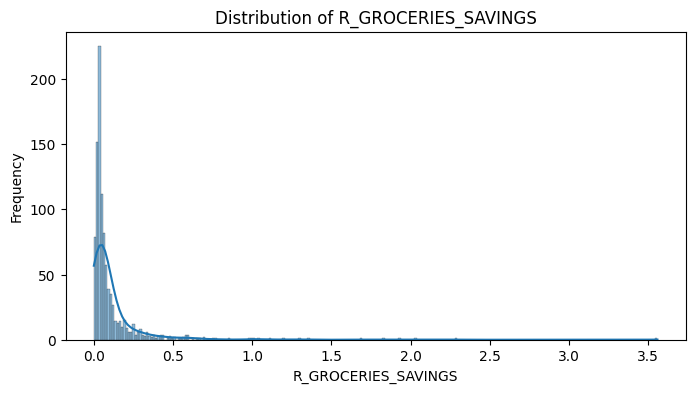

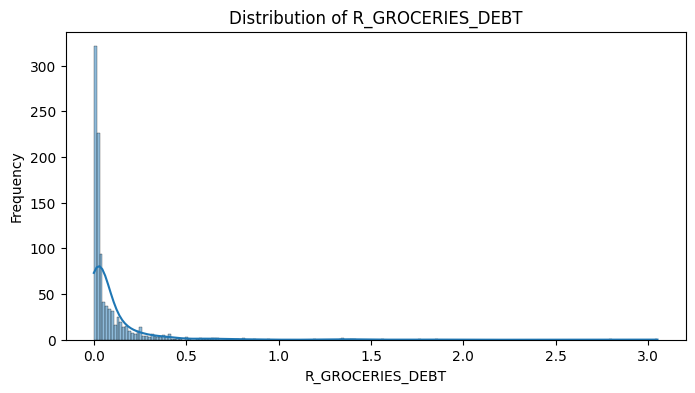

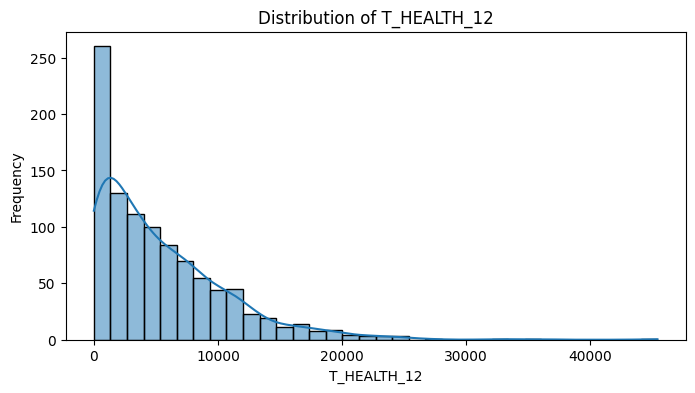

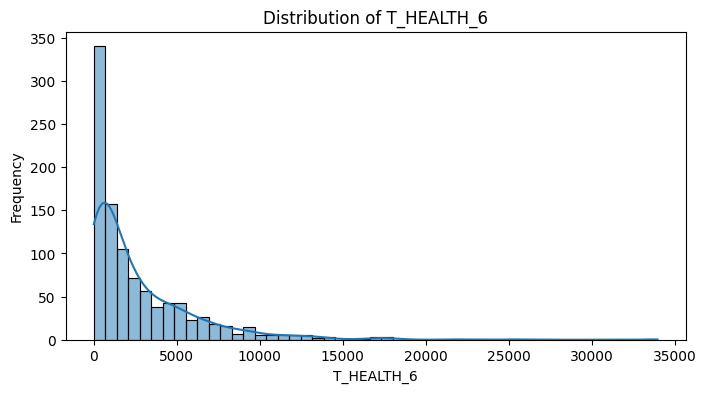

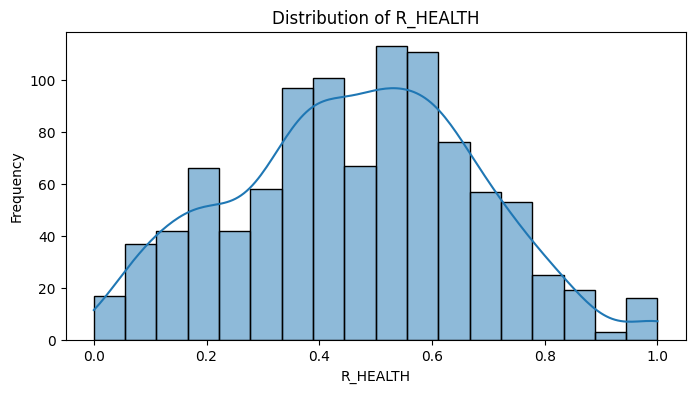

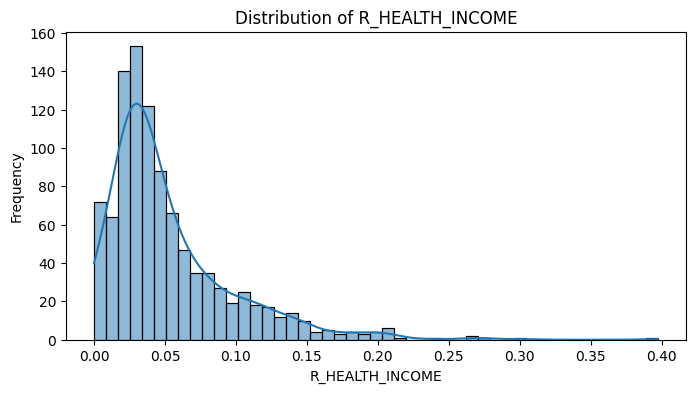

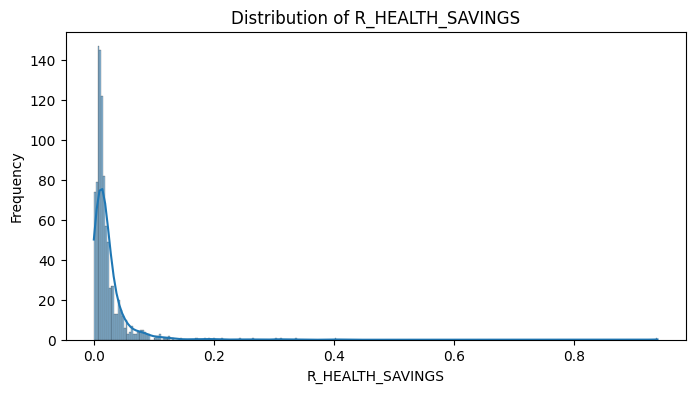

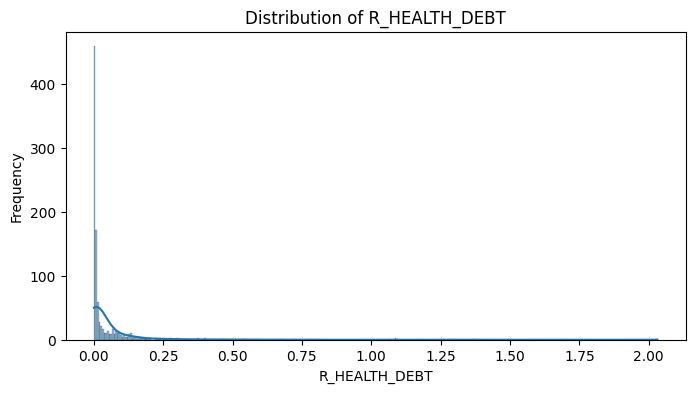

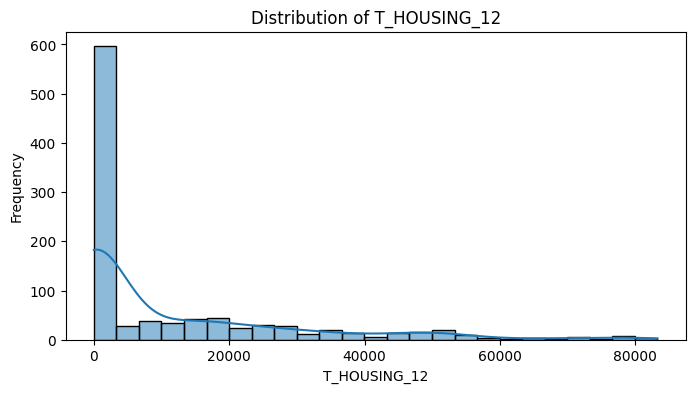

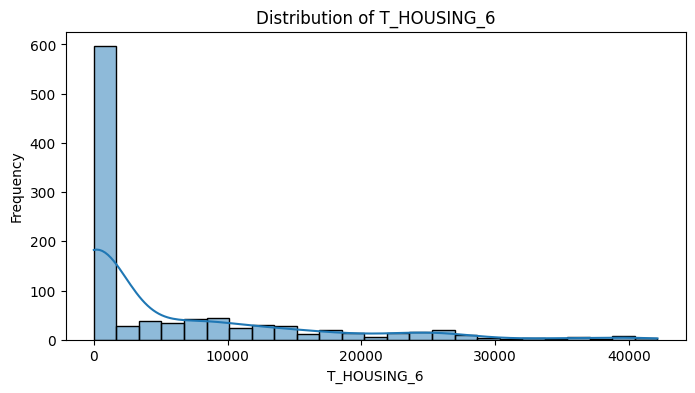

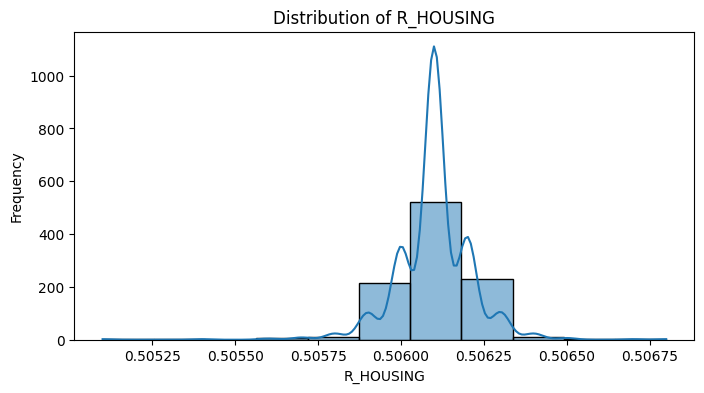

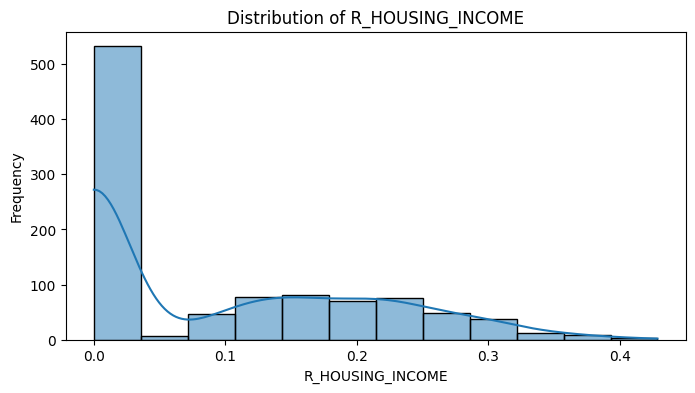

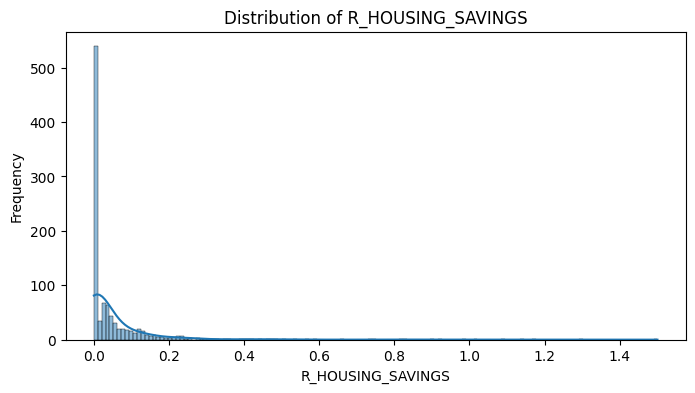

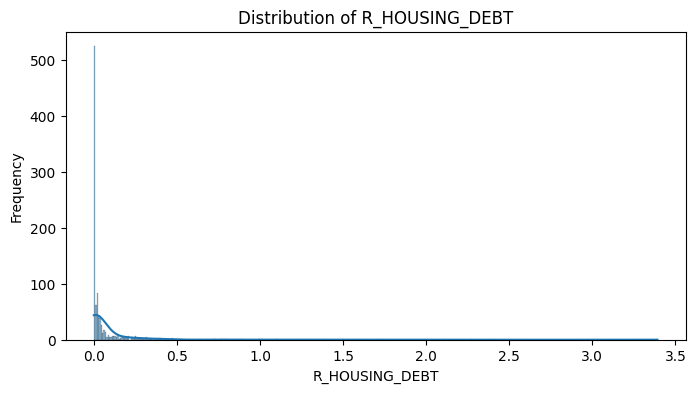

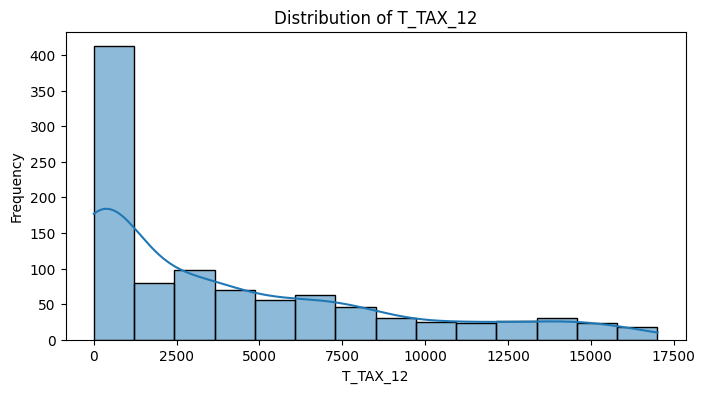

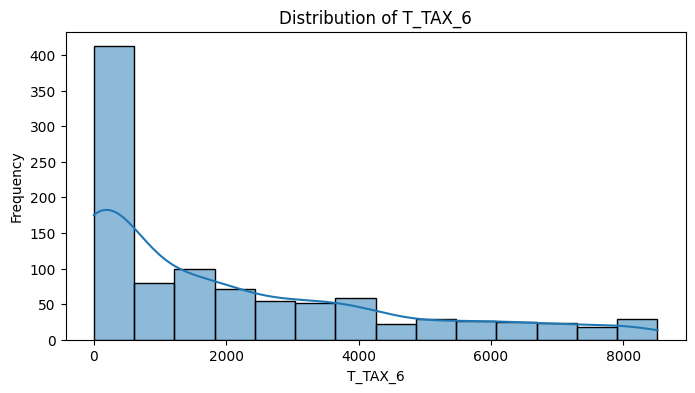

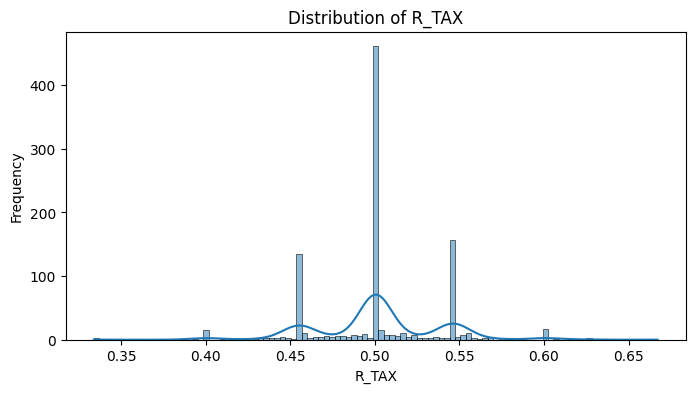

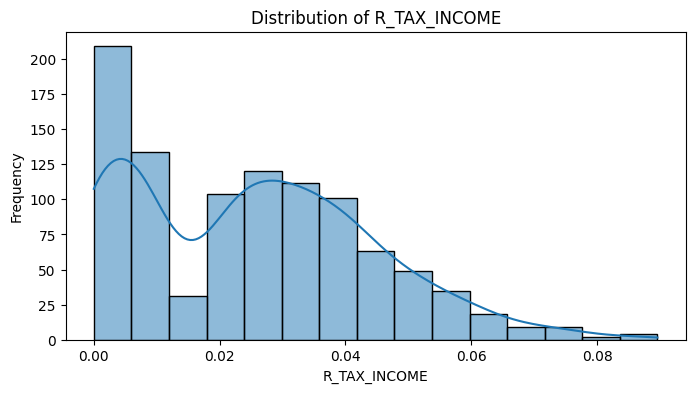

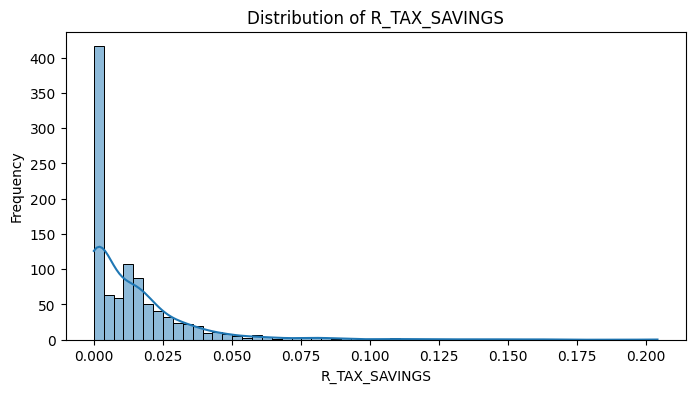

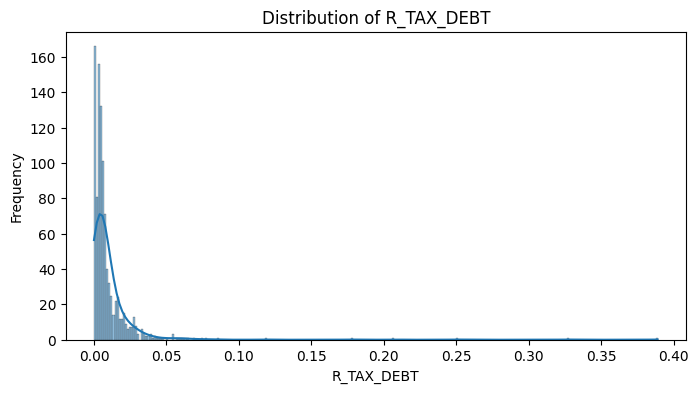

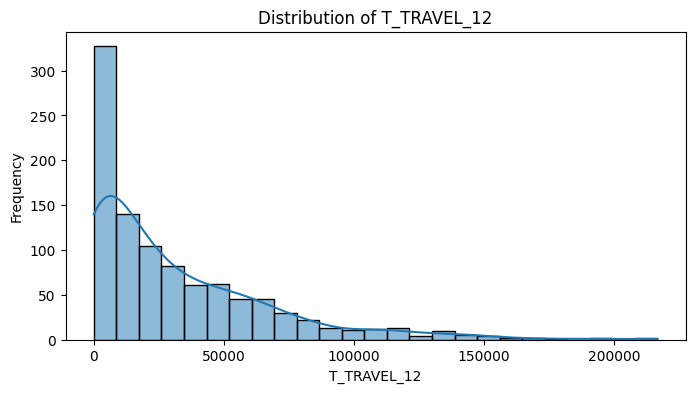

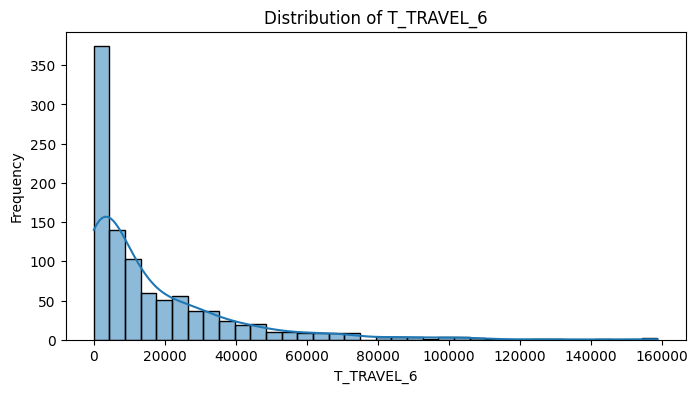

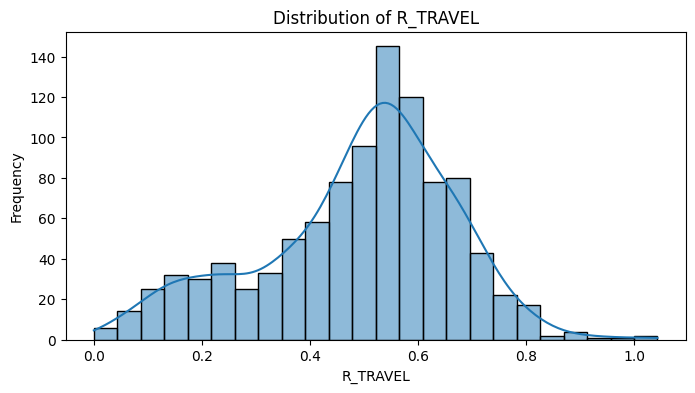

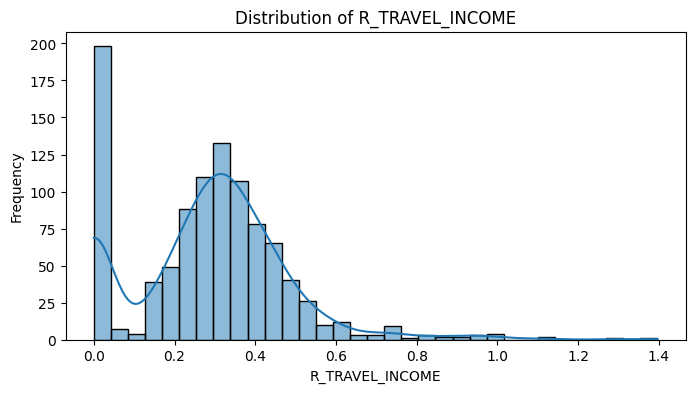

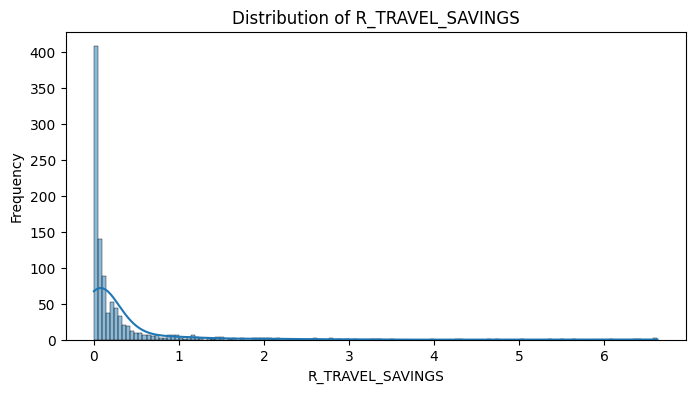

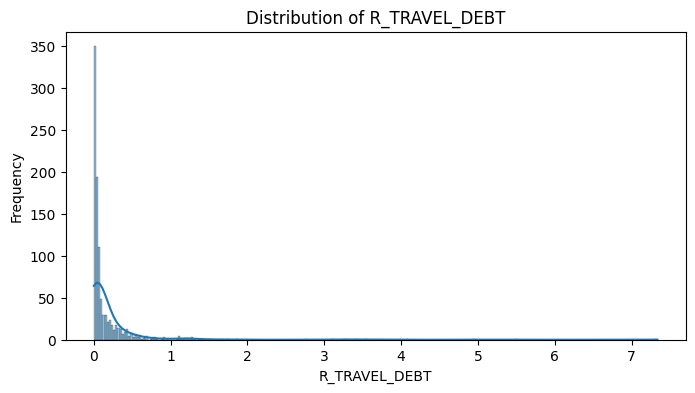

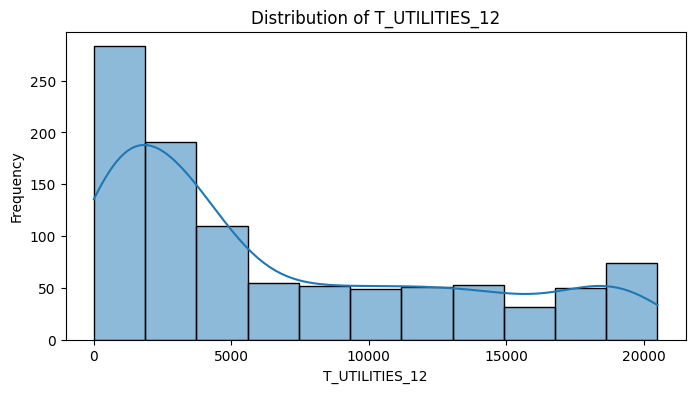

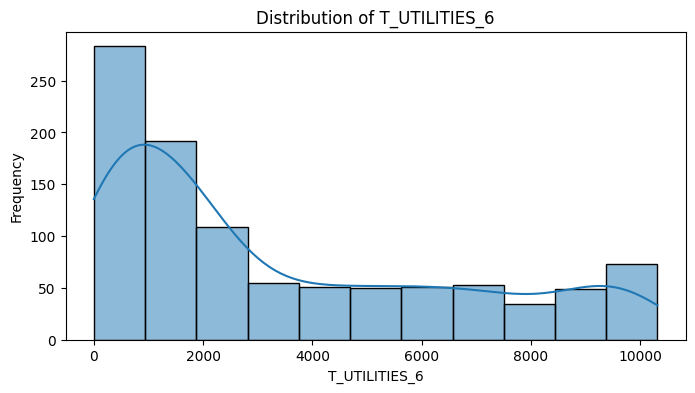

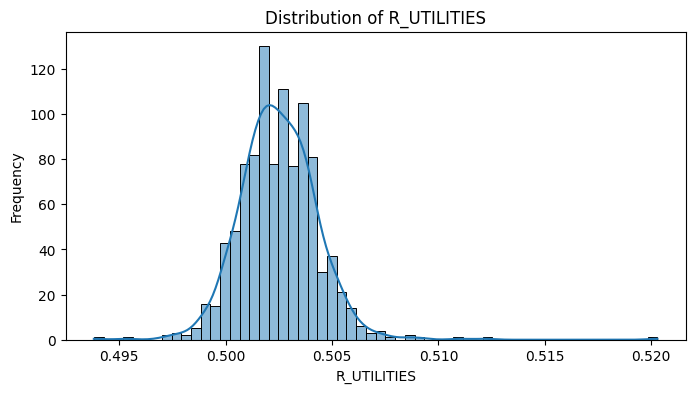

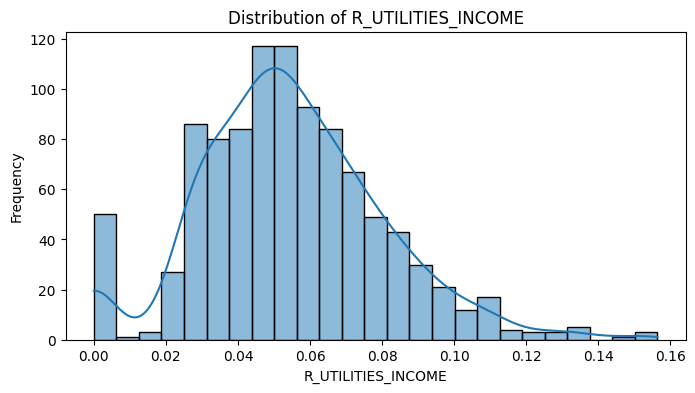

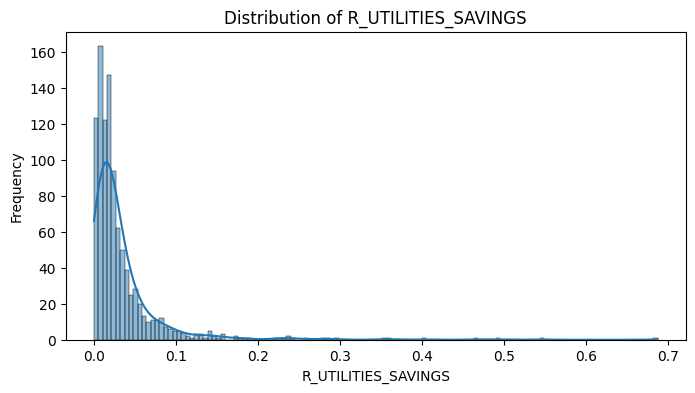

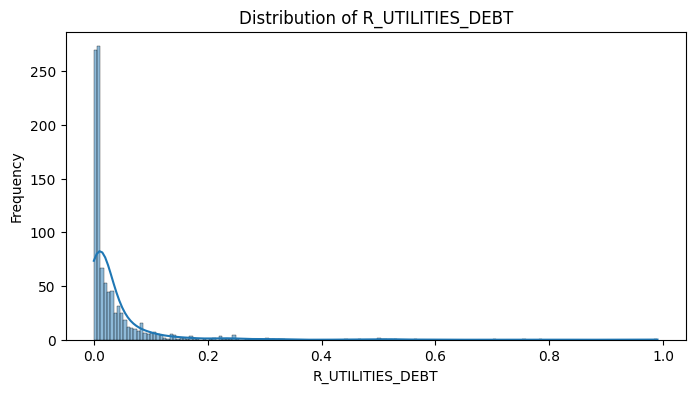

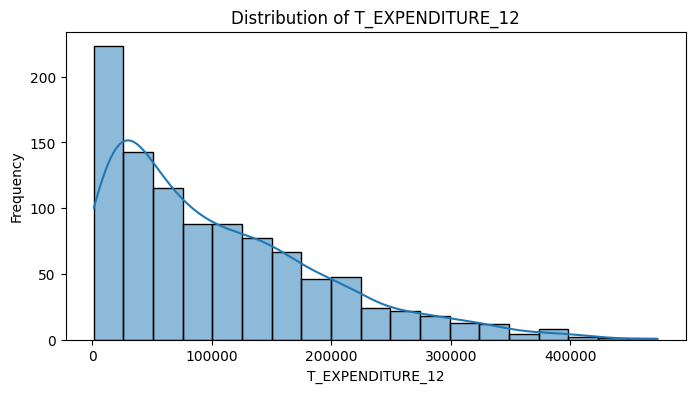

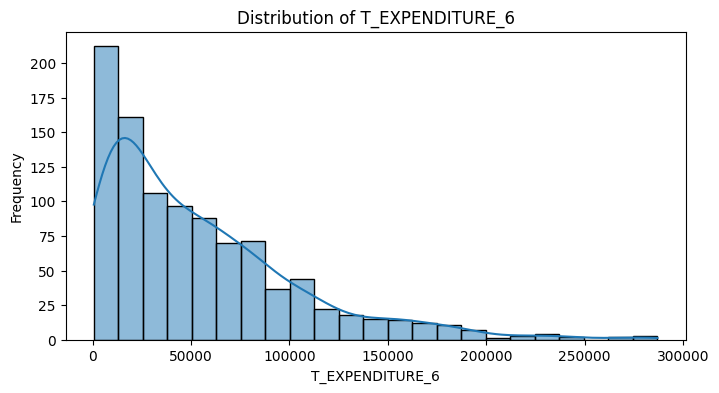

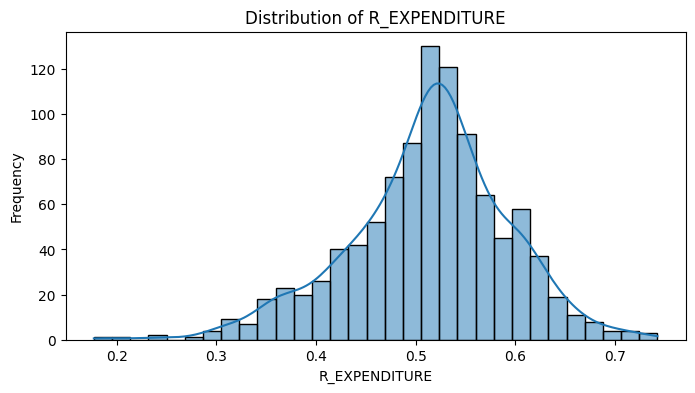

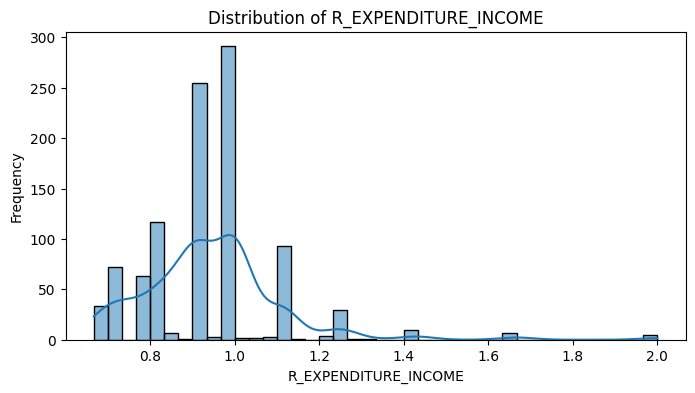

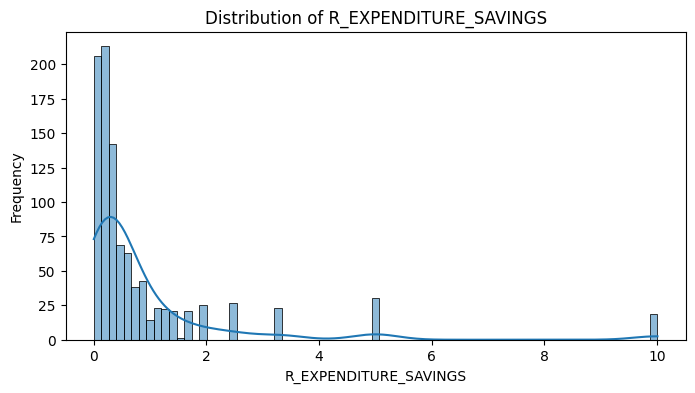

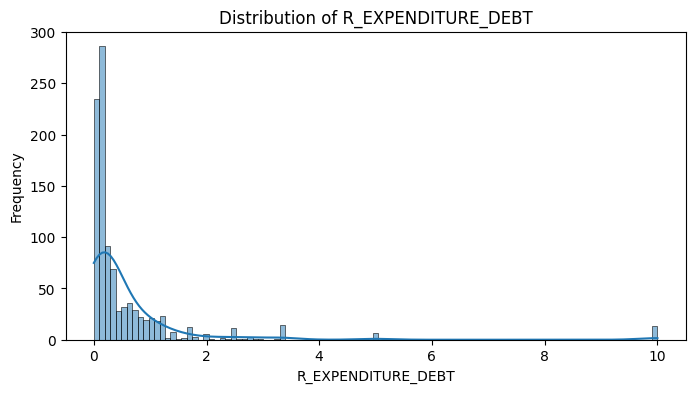

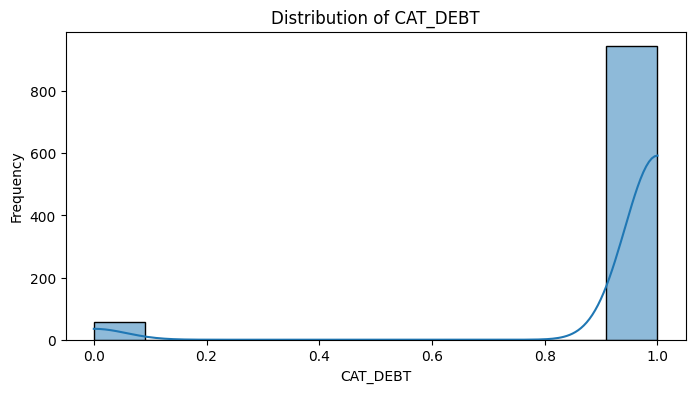

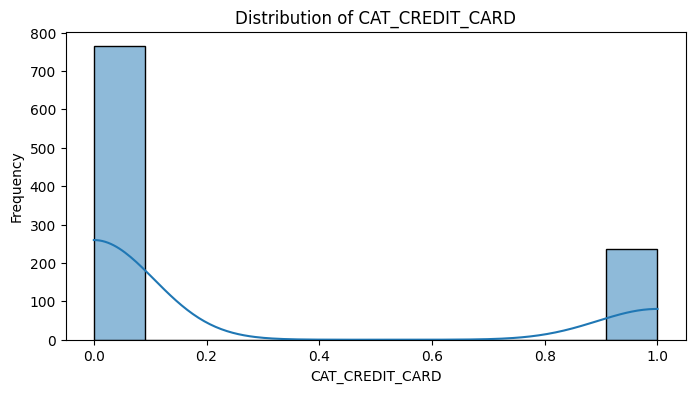

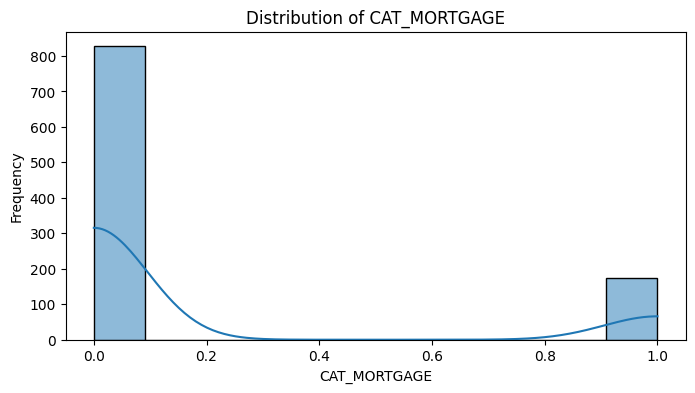

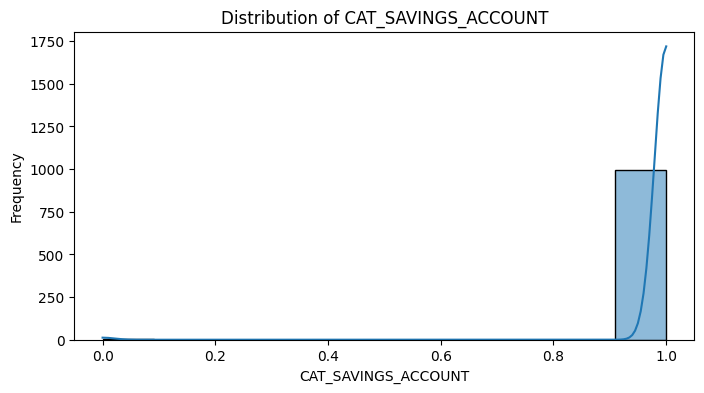

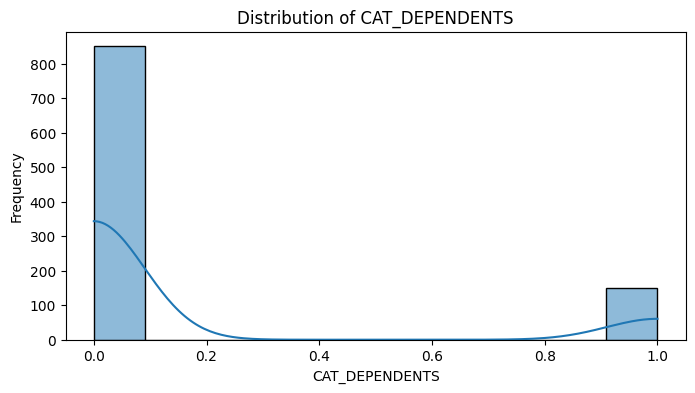

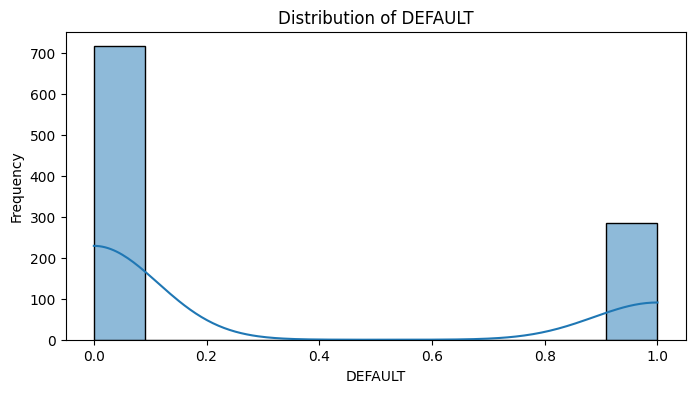

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Drop the target variable to focus on predictor variables
data = df.drop('CREDIT_SCORE', axis=1)

# Identify numeric predictor variables
numeric_predictors = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric predictor variable
for column in numeric_predictors:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Ans) you can follow these steps:

1 Detect and Remove Outliers: Find any outliers in your dataset and make a new dataset that doesn't contain any of them.

2 Model Training and Evaluation with Outliers: Utilizing the original dataset—which contains outliers—train a model and assess its efficacy.

3 Model Training and Evaluation without Outliers: Apply the same model type to the dataset devoid of outliers and assess the model's performance.

4 Compare Performances: To determine the impact, compare the performance measures of the models trained with and without outliers.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

path="/content/drive/MyDrive/Dataset/DATASET.csv"
data=pd.read_csv(path)
X = df.drop('CREDIT_SCORE', axis=1)  # Predictor variables
y = df['CREDIT_SCORE']               # Target variable

# Encoding categorical variables (if any)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Function to remove outliers based on Z-score
from scipy import stats
import numpy as np

def remove_outliers(df, threshold=3):
    z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    return df[(z < threshold).all(axis=1)]

# Removing outliers
X_train_no_outliers = remove_outliers(X_train)

# Aligning the target variable with the removed outliers
y_train_no_outliers = y_train[X_train_no_outliers.index]

# Train model with outliers
model_with_outliers = RandomForestRegressor(random_state=42)
model_with_outliers.fit(X_train, y_train)
predictions_with = model_with_outliers.predict(X_test)
mse_with = mean_squared_error(y_test, predictions_with)
r2_with = r2_score(y_test, predictions_with)

# Train model without outliers
model_without_outliers = RandomForestRegressor(random_state=42)
model_without_outliers.fit(X_train_no_outliers, y_train_no_outliers)
predictions_without = model_without_outliers.predict(X_test)
mse_without = mean_squared_error(y_test, predictions_without)
r2_without = r2_score(y_test, predictions_without)

# Comparing the results
print("With Outliers - MSE:", mse_with, "R2:", r2_with)
print("Without Outliers - MSE:", mse_without, "R2:", r2_without)


ValueError: Found array with 0 sample(s) (shape=(0, 1085)) while a minimum of 1 is required by RandomForestRegressor.

With Outliers - MSE: 0.04578947924051632 R2: 0.8844060935503391
Without Outliers - MSE: 0.057023755810451146 R2: 0.8560455632190485

12Q)12Q Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Ans Remove Random Portions of Data: Remove 1%, 5%, and 10% of data randomly from your dataset.

Apply Different Imputation Methods: Three different methods to impute the missing values. Common methods are mean imputation, median imputation, and K-Nearest Neighbors (KNN) imputation.

Evaluate Recovery of Missing Values: Compare the imputed values with the original ones (before removal) to calculate the percentage error on residuals for numeric data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Load the dataset


# Choose only numeric columns for simplicity in calculating errors
data_numeric = df.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(df, percentage):
    df_copy = df.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    mse = mean_squared_error(original_data, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")



Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 12538.326766634573
Imputation Method: median, RMSE: 14210.199828936084
Imputation Method: knn, RMSE: 11764.584359941276

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 26285.30221696382
Imputation Method: median, RMSE: 27347.769727511877
Imputation Method: knn, RMSE: 15114.249385162355

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 34067.616544498334
Imputation Method: median, RMSE: 37349.9894227682
Imputation Method: knn, RMSE: 23826.082735883694


13Q)For categorical data, calculate the accuracy and a confusion matrix.

Ans First preprocess the data, choose the classification model, Train the model, make prediction on test data, compare predicted values to the accurate values and then create the confusion matrix.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path ='/content/drive/MyDrive/Dataset/DATASET.csv'  # Replace with your dataset path
data = pd.read_csv('/content/drive/MyDrive/Dataset/DATASET.csv',encoding='ISO-8859-1')


# Assume 'Category' is the target categorical variable and 'features' are the predictors
target = 'DEFAULT'
features = data.drop(target, axis=1)

# Encoding categorical variables (if any)
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Output the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.72
Confusion Matrix:
 [[132  14]
 [ 42  12]]
